# Handwritten Digit (MNIST) Recognizer

A popular demonstration of the capability of deep learning techniques is object recognition in image data. Recently. most of the image recognition is done by more complicated neural nets called convolutional neural nets (CNNs). But here we will see how to do simple (and surprisingly accurate) image recognition using just feed forwards.

The “hello world” of object recognition for machine learning is the MNIST dataset for handwritten digit recognition.

In this post you will discover how to develop a deep learning model to achieve near state of the art performance on the MNIST handwritten digit recognition task in Python using the sklearn machine learning library.

After completing this tutorial, you will know:

- Preprocessing: How to load the MNIST dataset, scale the data and reshape the image pixel matrices.
- Training: How to develop and evaluate a baseline neural network model for the MNIST problem.
- Visualization: How to peer inside the model to see what the model is doing.

Before we get started with the nitty-gritty, I suggest you go to this link for [visualizing image recognition in a feed forward network](http://scs.ryerson.ca/~aharley/vis/fc/) to help you understand what we'll be doing.

Well let's get to it!

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [2]:
# load (will downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Our pictures are matrices of numbers, shape=(28, 28). A neural network doesn't know how to take a matrix as input. We need to flatten our (28, 28) matrix into a vector of (784,). Our model will have 784 nodes in the input layer, one for each pixel. These 784 pixels are called our *features* or sometimes called *independent variables* or sometimes called *predictors*.

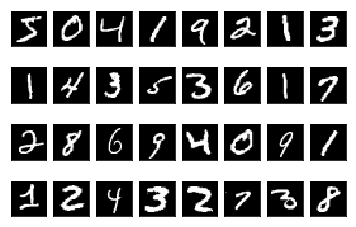

In [3]:
# plot some of the images as gray scale
fig, axes = plt.subplots(4, 8)
for i, ax in enumerate(axes.ravel()):
    ax.imshow(X_train[i], cmap=plt.cm.gray)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

In [4]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [5]:
# scale the pixel values into range [0, 1]
scaler = MinMaxScaler()
scaler.fit(X_train.astype("float64"))

X_train = scaler.transform(X_train.astype("float64"))
X_test = scaler.transform(X_test.astype("float64"))
print("Min: {}, Max: {}".format(np.min(X_train), np.max(X_train)))

Min: 0.0, Max: 1.0


In [6]:
from sklearn.neural_network import MLPClassifier
# notice just a simple 1 hidden layer, 16 node network!
clf = MLPClassifier(hidden_layer_sizes=(16,), max_iter=10,
                    solver='sgd', verbose=10, random_state=42,
                    learning_rate_init=.1)

clf.fit(X_train, y_train)

Iteration 1, loss = 0.37869150
Iteration 2, loss = 0.22391845
Iteration 3, loss = 0.19760346
Iteration 4, loss = 0.18163137
Iteration 5, loss = 0.16945695
Iteration 6, loss = 0.16067858
Iteration 7, loss = 0.15375713
Iteration 8, loss = 0.14632547
Iteration 9, loss = 0.14293766
Iteration 10, loss = 0.13910074


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(16,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=10, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=10, warm_start=False)

### Visualization of MLP weights on MNIST


Sometimes looking at the learned coefficients of a neural network can provide
insight into the learning behavior. For example if weights look unstructured,
maybe some were not used at all, or if very large coefficients exist, maybe
regularization was too low or the learning rate too high.

This example shows a plot of some of the first layer weights in a
MLPClassifier trained on the MNIST dataset.

The input data consists of 28x28 pixel handwritten digits, leading to 784
features in the dataset. Therefore the first layer weight matrix have the shape
(784, hidden_layer_sizes[0]).  We can therefore visualize a single column of
the weight matrix as a 28x28 pixel image.

To make the example run faster, we use very few hidden units, and train only
for a very short time. Training longer would result in weights with a much
smoother spatial appearance.

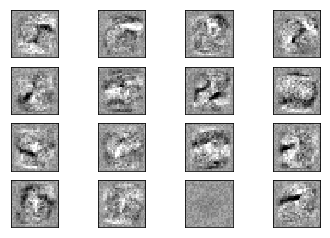

In [7]:
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = clf.coefs_[0].min(), clf.coefs_[0].max()
for coef, ax in zip(clf.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

The above images represent the weights leading from the input layer to each of the 16 nodes in the first hidden layer (reshaped again from the 784 edges per node to (28, 28) for easy visualization). Remember all weights start out as completely random (as a image, this looks like static), but as the model trains, the weights get updated to represent more important regions. Here you can see that overall the middle regions are much more important than the outer regions.

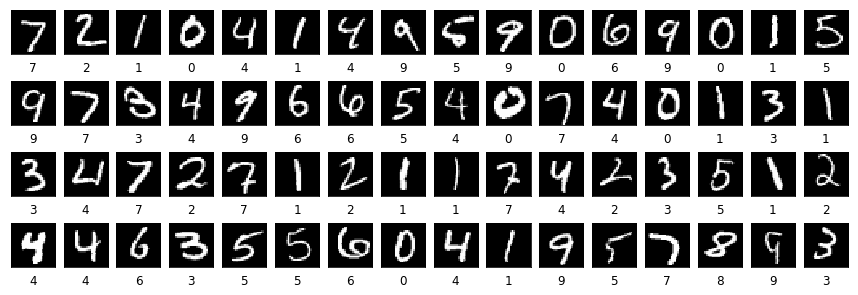

In [8]:
# let's see how our model is predicting on test data!
fig, axes = plt.subplots(4, 16, figsize=(15,5))
y_pred = clf.predict(X_test)
for i, (x, y, ax) in enumerate(zip(X_test, y_pred, axes.ravel())):
    ax.imshow(x.reshape(28, 28), cmap=plt.cm.gray)
    ax.text(0.5,-0.4, str(y), size=12, ha="center", 
         transform=ax.transAxes)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

Looks like its predicting pretty well on data we never showed it before! Almost too good... can you spot any that it predicted wrong? I'm suspicious. I would like to know which numbers it is messing up on!

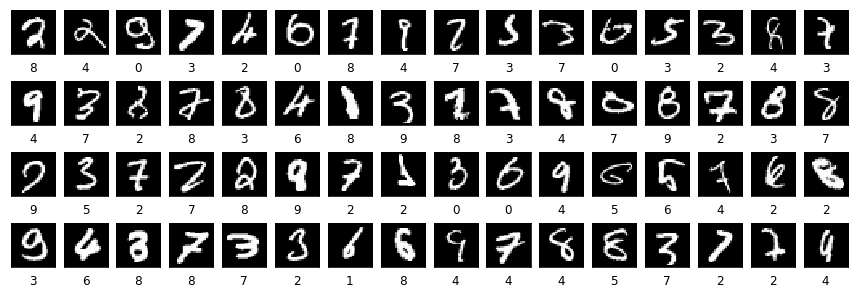

In [9]:
fig, axes = plt.subplots(4, 16, figsize=(15,5))
incorrect_pred = (y_pred != y_test)
incorect_X = X_test[incorrect_pred]
incorect_y = y_pred[incorrect_pred]
for i, (x, y, ax) in enumerate(zip(incorect_X, incorect_y, axes.ravel())):
    ax.imshow(x.reshape(28, 28), cmap=plt.cm.gray)
    ax.text(0.5,-0.4, str(y), size=12, ha="center", 
         transform=ax.transAxes)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

Ok. So it does mess up on some. Well overall I think it's still doing pretty well. Let's see how well we did.

In [10]:
print("Test set score: %.3f" % clf.score(X_test, y_test))

Test set score: 0.953


##### 95! Yay, we aced this exam.